# Bonus

In [1]:
import requests
import urllib
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import pickle
import copy

We simply get the dataframe we made for the masters part.

In [5]:
# opening the file
df_masters = pickle.load( open( "df_masters.p", "rb" ) )

In [7]:
# DataFrame with all the students ordered by timeline, this is to see each student's enrollment history.
df_masters = df_masters.sort_values(by=['Nom Prénom', 'Periode academique', 'Type de semestre']).dropna(axis=1)
df_masters.head()

,Civilité,Nom Prénom,Statut,No Sciper,Periode academique,Periode pedagogique,Type de semestre
240,Madame,Abbadi Hajar,Présent,238067,2013-2014,Master semestre 1,Semestre d'automne
1925,Madame,Abbadi Hajar,Présent,238067,2013-2014,Master semestre 2,Semestre de printemps
1454,Madame,Abbadi Hajar,Présent,238067,2014-2015,Master semestre 3,Semestre d'automne
938,Monsieur,Abelenda Diego,Présent,170646,2010-2011,Master semestre 1,Semestre d'automne
2693,Monsieur,Abelenda Diego,Présent,170646,2010-2011,Master semestre 2,Semestre de printemps


In [8]:
# Examining the number of students in each group
df_masters.groupby('Periode pedagogique').count()['Nom Prénom']

Periode pedagogique
Master semestre 1           948
Master semestre 2          1062
Master semestre 3           706
Projet Master automne        86
Projet Master printemps      42
Name: Nom Prénom, dtype: int64

# Assumptions and method for calculating average stay
Same as in the masters part

In [10]:
df = df_masters

In [11]:
df = df[df['Periode pedagogique'].isin(['Master semestre 1','Master semestre 2', 'Master semestre 3'])].sort_values(by=['Nom Prénom', 'Periode academique', 'Type de semestre'])

In [12]:
# extracting year and semester
df['year'] = df['Periode academique'].str[0:4].astype(int)
df['semester'] = np.where(df['Type de semestre'] == "Semestre d'automne", 0,1)
df = df[df['Periode pedagogique'].isin(['Master semestre 1','Master semestre 2', 'Master semestre 3'])].sort_values(by=['Nom Prénom', 'Periode academique', 'Type de semestre'])

In [14]:
# orgnaization

#First master semester df
first_row = df.groupby('Nom Prénom').first()
first_row.rename(columns={'year':'first_year', 'semester':'first_semester'}, inplace=True)
first_row = first_row[['Civilité','first_year','first_semester']]
first_row.reset_index(inplace=True)

#Last master semester df
last_row = df.groupby('Nom Prénom').last()
last_row.rename(columns={'year':'last_year', 'semester':'last_semester'}, inplace=True)
last_row = last_row[['Civilité','last_year','last_semester']]
last_row.reset_index(inplace=True)

In [15]:
# df_dur is the DataFrame with all the necessary information, combining gender, along with the average stay
df_dur = first_row.merge(last_row)

# Duration Calculation
Same as in Part 2

In [16]:
df_dur['Duration in Months'] = (df_dur['last_year'] - df_dur['first_year'])*12 + (df_dur['last_semester'] - df_dur['first_semester'] + 1)*6 + 6 

In [17]:
df_dur.head()

,Nom Prénom,Civilité,first_year,first_semester,last_year,last_semester,Duration in Months
0,Abbadi Hajar,Madame,2013,0,2014,0,24
1,Abelenda Diego,Monsieur,2010,0,2011,1,30
2,Abi Akar Nora,Madame,2015,0,2016,0,24
3,Adamsons Valdis,Monsieur,2016,0,2016,0,12
4,Adams Marc Alain,Monsieur,2016,0,2016,0,12


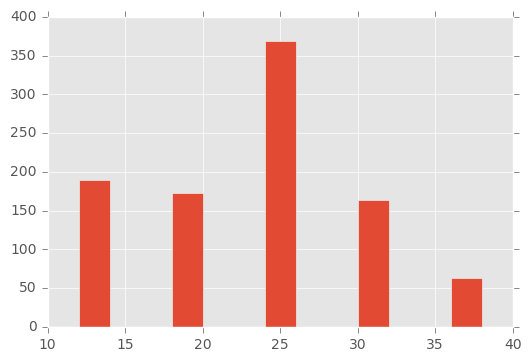

In [18]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

df_dur['Duration in Months'].hist(bins = 15, range=[10, 40])

# Females

In [19]:
madames = df_dur[df_dur['Civilité'] == 'Madame']
print('mean =',  madames['Duration in Months'].mean(), ';median =',  madames['Duration in Months'].median())


mean = 22.772727272727273 ;median = 24.0


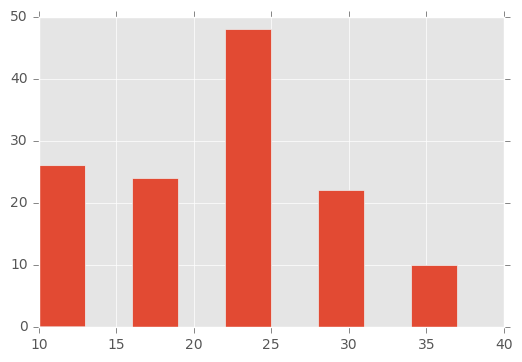

In [20]:
madames['Duration in Months'].hist(bins = 10, range=[10, 40])


# Males

In [21]:
monsieurs = df_dur[df_dur['Civilité'] == 'Monsieur']
print('mean =',  monsieurs['Duration in Months'].mean(), ';median =',  monsieurs['Duration in Months'].median())


mean = 22.734597156398106 ;median = 24.0


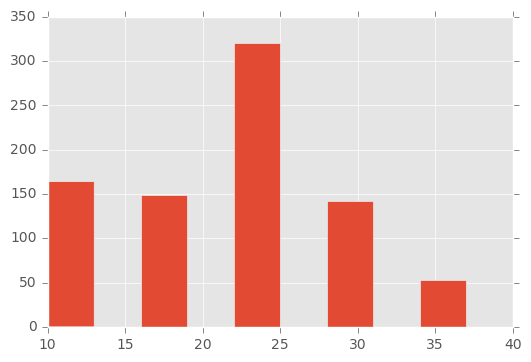

In [23]:
monsieurs['Duration in Months'].hist(bins = 10, range=[10, 40])


# Hypothesis testing
We want to check whether the the difference in average time taken by males and females to complete the degree is statistically significant. The null hypothesis is that the male and the female population have equal means. For this we use the Welch's T-Test. According to wikipedia this test 'is more reliable when the two samples have unequal variances and unequal sample sizes' which is the case for us.

In [24]:
import scipy.stats as stats

In [25]:
stats.ttest_ind(a = madames['Duration in Months'], b= monsieurs['Duration in Months'], equal_var=False)

Ttest_indResult(statistic=0.05381065020459775, pvalue=0.95714809952665525)

The p-value is too high for the difference to be statistically significant, unlike in the Bachelors case.

# Plotting

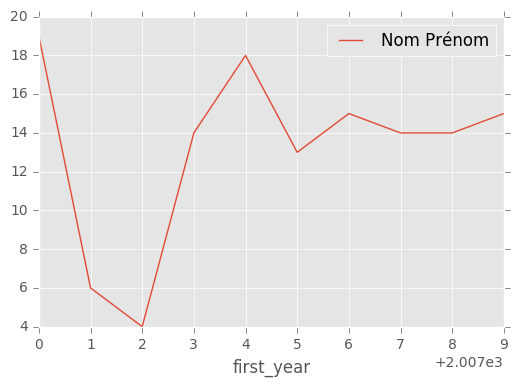

In [57]:
female = pd.DataFrame( madames.groupby('first_year').count()['Nom Prénom'] )
t1 = female.plot()

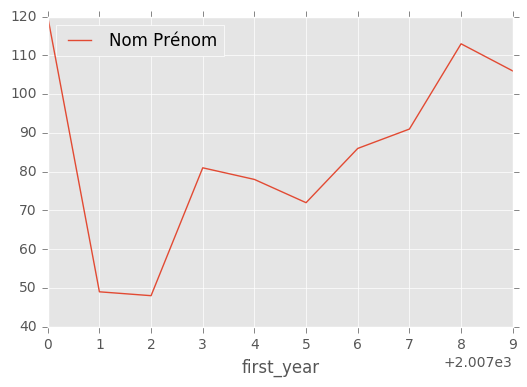

In [64]:
male = pd.DataFrame( monsieurs.groupby('first_year').count()['Nom Prénom']  )
male.plot()

We can see that the trends are similar.